In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from math import sin,radians,cos,atan2,sqrt

data=pd.read_csv("uber.csv")

print(data)

        Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225 

In [34]:
df=data[['fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count']]


#Preprocess the data
print(data.isnull().sum())

data['dropoff_longitude'].fillna(data['dropoff_longitude'].mean(),inplace=True)
data['dropoff_latitude'].fillna(data['dropoff_latitude'].mean(),inplace=True)

print(data.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [ ]:
#checking correlation
df=data[['fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count']]

m=df.corr()

print(m)

In [35]:
# Write Functio to get distan between two coordinates

def Haversin_distance(lat1,lon1,lat2,lon2):
    lon1=radians(lon1)
    lat1=radians(lat1)
    lon2=radians(lon2)
    lat2=radians(lat2)
    
    dlon=lon2-lon1
    dlat=lat2-lat1
    
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    
    c=atan2(sqrt(a),sqrt(1-a))
    
    distance=c*6347
    
    return distance

In [36]:
data['distance']=data.apply(lambda row:Haversin_distance(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

print(data['distance'])

0         0.838491
1         1.224166
2         2.508702
3         0.827712
4         2.229295
            ...   
199995    0.055894
199996    0.933993
199997    6.400956
199998    1.763191
199999    2.698687
Name: distance, Length: 200000, dtype: float64


In [37]:
#preparing Data for modeling
X=data['distance']
Y=data['fare_amount']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [39]:
#Linear Reression
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr_pred=lr.predict(X_test)

In [40]:
#Random Forest
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)

In [49]:
r2_lr=r2_score(Y_test,lr_pred)
lr_mse=mean_squared_error(Y_test,lr_pred,squared=False)

r2_rf=r2_score(Y_test,rf_pred)
rf_mse=mean_squared_error(Y_test,rf_pred,squared=Fase)

In [45]:
print(f"Linear Regression R2: {r2_lr}  MSE: {lr_mse}")
print(f"Random Forest  R2 : {r2_rf}  MSE: {rf_mse}")

Linear Regression R2: 0.0006955974937858933  MSE: 99.87868877420276
Random Forest  R2 : 0.5922503747021425  MSE: 40.75384619619872


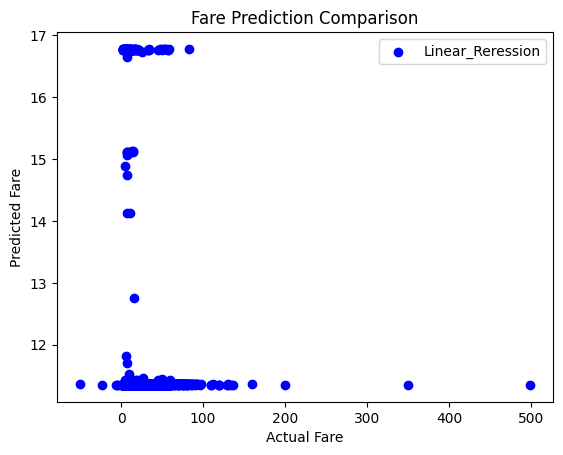

In [55]:
#ploting graph for showing predicting 
plt.scatter(Y_test,lr_pred,color='blue',label="Linear_Reression")

plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Fare Prediction Comparison')

# Add a legend
plt.legend()
plt.show()

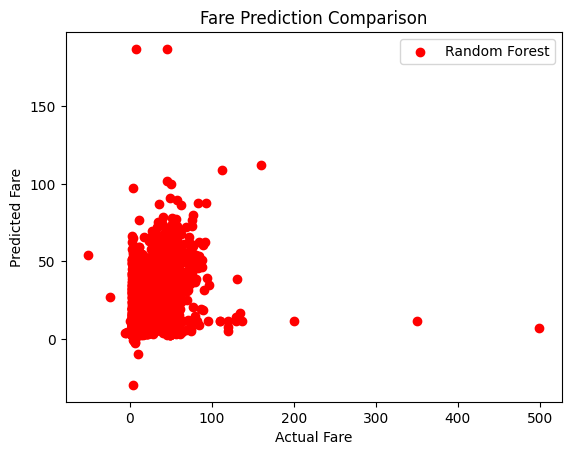

In [54]:
plt.scatter(Y_test,rf_pred,color='red',label="Random Forest")
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Fare Prediction Comparison')

# Add a legend
plt.legend()
plt.show()